# Programming Exercise 7b:
# Principal Component Analysis

## Introduction

In this exercise you will use principal component analysis to find a low-dimensional representation of face images. 

Before we begin with the exercises, we need to import all libraries required for this programming exercise. We will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, [`matplotlib`](https://matplotlib.org/) for plotting, and [`scipy`](https://docs.scipy.org/doc/scipy/reference/) for scientific and numerical computation functions and tools. 

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Import regular expressions to process emails
import re

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

from IPython.display import HTML, display, clear_output

try:
    pyplot.rcParams["animation.html"] = "jshtml"
except ValueError:
    pyplot.rcParams["animation.html"] = "html5"

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# library written for this exercise providing additional functions and others
import utils

%load_ext autoreload
%autoreload 2



# tells matplotlib to embed plots within the notebook
%matplotlib inline

##  Principal Component Analysis

In this exercise, you will use principal component analysis (PCA) to perform dimensionality reduction. You will first experiment with an example 2D dataset to get intuition on how PCA works, and then use it on a bigger dataset of 5000 face image dataset.

### 2.1 Example Dataset

To help you understand how PCA works, you will first start with a 2D dataset which has one direction of large variation and one of smaller variation. The cell below will plot the training data, also shown in here:

In this part of the exercise, you will visualize what happens when you use PCA to reduce the data from 2D to 1D. In practice, you might want to reduce data from 256 to 50 dimensions, say; but using lower dimensional data in this example allows us to visualize the algorithms better.

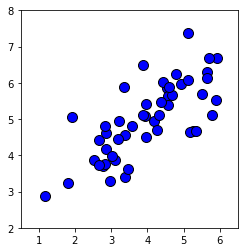

In [2]:
# Load the dataset into the variable X 
data = loadmat(os.path.join('Data', 'ex7data1.mat'))
X = data['X']

#  Visualize the example dataset
pyplot.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=1)
pyplot.axis([0.5, 6.5, 2, 8])
pyplot.gca().set_aspect('equal')
pyplot.grid(False)

<a id="section3"></a>
### 2.2 Implementing PCA

In this part of the exercise, you will implement PCA. PCA consists of two computational steps: 

1. Compute the covariance matrix of the data.
2. Use SVD (in python we use numpy's implementation `np.linalg.svd`) to compute the eigenvectors $U_1$, $U_2$, $\dots$, $U_n$. These will correspond to the principal components of variation in the data.

First, you should compute the covariance matrix of the data, which is given by:

$$ \Sigma = \frac{1}{m} X^T X$$

where $X$ is the data matrix with examples in rows, and $m$ is the number of examples. Note that $\Sigma$ is a $n \times n$ matrix and not the summation operator. 

After computing the covariance matrix, you can run SVD on it to compute the principal components. In python and `numpy` (or `scipy`), you can run SVD with the following command: `U, S, V = np.linalg.svd(Sigma)`, where `U` will contain the principal components and `S` will contain a diagonal matrix. Note that the `scipy` library also has a similar function to compute SVD `scipy.linalg.svd`. The functions in the two libraries use the same C-based library (LAPACK) for the SVD computation, but the `scipy` version provides more options and arguments to control SVD computation. In this exercise, we will stick with the `numpy` implementation of SVD.

Complete the code in the following cell to implemente PCA.
<a id="pca"></a>

In [3]:
def pca(X):
    """
    Run principal component analysis.
    
    Parameters
    ----------
    X : array_like
        The dataset to be used for computing PCA. It has dimensions (m x n)
        where m is the number of examples (observations) and n is 
        the number of features.
    
    Returns
    -------
    U : array_like
        The eigenvectors, representing the computed principal components
        of X. U has dimensions (n x n) where each column is a single 
        principal component.
    
    S : array_like
        A vector of size n, contaning the singular values for each
        principal component. Note this is the diagonal of the matrix we 
        mentioned in class.
    
    Instructions
    ------------
    You should first compute the covariance matrix. Then, you
    should use the "svd" function to compute the eigenvectors
    and eigenvalues of the covariance matrix. 

    Notes
    -----
    When computing the covariance matrix, remember to divide by m (the
    number of examples).
    """
    # Useful values
    m, n = X.shape

    # You need to return the following variables correctly.
    U = np.zeros(n)
    S = np.zeros(n)

    # ====================== YOUR CODE HERE ======================
    U, S, _ = np.linalg.svd((1/m) *(X.T.dot(X)))
    # ============================================================
    return U, S

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range.

In the next cell,  this normalization will be performed for you using the `utils.featureNormalize` function.
After normalizing the data, you can run PCA to compute the principal components. Your task is to complete the code in the function `pca` to compute the principal components of the dataset. 

Once you have completed the function `pca`, the following cell will run PCA on the example dataset and plot the corresponding principal components found similar to the figure below. 

![](Figures/pca_components.png)


The following cell will also output the top principal component (eigenvector) found, and you should expect to see an output of about `[-0.707 -0.707]`. (It is possible that `numpy` may instead output the negative of this, since $U_1$ and $-U_1$ are equally valid choices for the first principal component.)

Top eigenvector: U[:, 0] = [-0.707107 -0.707107]
 (you should expect to see [-0.707107 -0.707107])


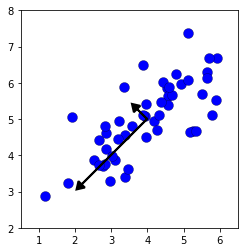

In [4]:
#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = utils.featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
fig, ax = pyplot.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=0.25)

for i in range(2):
    ax.arrow(mu[0], mu[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i],
             head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.axis([0.5, 6.5, 2, 8])
ax.set_aspect('equal')
ax.grid(False)

print('Top eigenvector: U[:, 0] = [{:.6f} {:.6f}]'.format(U[0, 0], U[1, 0]))
print(' (you should expect to see [-0.707107 -0.707107])')

### 2.3 Dimensionality Reduction with PCA

After computing the principal components, you can use them to reduce the feature dimension of your dataset by projecting each example onto a lower dimensional space, $x^{(i)} \rightarrow z^{(i)}$ (e.g., projecting the data from 2D to 1D). In this part of the exercise, you will use the eigenvectors returned by PCA and
project the example dataset into a 1-dimensional space. In practice, if you were using a learning algorithm such as linear regression or perhaps neural networks, you could now use the projected data instead of the original data. By using the projected data, you can train your model faster as there are less dimensions in the input.

<a id="section4"></a>

#### 2.3.1 Projecting the data onto the principal components

You should now complete the code in the function `projectData`. Specifically, you are given a dataset `X`, the principal components `U`, and the desired number of dimensions to reduce to `K`. You should project each example in `X` onto the top `K` components in `U`. Note that the top `K` components in `U` are given by
the first `K` columns of `U`, that is `Ureduce = U[:, :K]`.
<a id="projectData"></a>

In [5]:
def projectData(X, U, K):
    """
    Computes the reduced data representation when projecting only 
    on to the top K eigenvectors.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). The dataset is assumed to be 
        normalized.
    
    U : array_like
        The computed eigenvectors using PCA. This is a matrix of 
        shape (n x n). Each column in the matrix represents a single
        eigenvector (or a single principal component).
    
    K : int
        Number of dimensions to project onto. Must be smaller than n.
    
    Returns
    -------
    Z : array_like
        The projects of the dataset onto the top K eigenvectors. 
        This will be a matrix of shape (m x k).
    
    Instructions
    ------------
    Compute the projection of the data using only the top K 
    eigenvectors in U (first K columns). 
    For the i-th example X[i,:], the projection on to the k-th 
    eigenvector is given as follows:
    
        x = X[i, :]
        projection_k = np.dot(x,  U[:, k])

    """
    # You need to return the following variables correctly.
    Z = np.zeros((X.shape[0], K))

    # ====================== YOUR CODE HERE ======================

    Z = np.dot(X,U[:, :K])
    
    # =============================================================
    return Z

Once you have completed the code in `projectData`, the following cell will project the first example onto the first dimension and you should see a value of about 1.481 (or possibly -1.481, if you got $-U_1$ instead of $U_1$).

In [6]:
#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: {:.6f}'.format(Z[0, 0]))
print('(this value should be about    : 1.481274)')

Projection of the first example: 1.481274
(this value should be about    : 1.481274)


<a id="section5"></a>
#### 2.3.2 Reconstructing an approximation of the data

After projecting the data onto the lower dimensional space, you can approximately recover the data by projecting them back onto the original high dimensional space. Your task is to complete the function `recoverData` to project each example in `Z` back onto the original space and return the recovered approximation in `Xrec`.
<a id="recoverData"></a>

In [7]:
def recoverData(Z, U, K):
    """
    Recovers an approximation of the original data when using the 
    projected data.
    
    Parameters
    ----------
    Z : array_like
        The reduced data after applying PCA. This is a matrix
        of shape (m x K).
    
    U : array_like
        The eigenvectors (principal components) computed by PCA.
        This is a matrix of shape (n x n) where each column represents
        a single eigenvector.
    
    K : int
        The number of principal components retained
        (should be less than n).
    
    Returns
    -------
    X_rec : array_like
        The recovered data after transformation back to the original 
        dataset space. This is a matrix of shape (m x n), where m is 
        the number of examples and n is the dimensions (number of
        features) of original datatset.
    
    Instructions
    ------------
    Compute the approximation of the data by projecting back
    onto the original space using the top K eigenvectors in U.
    For the i-th example Z[i,:], the (approximate)
    recovered data for dimension j is given as follows:

        v = Z[i, :]
        recovered_j = np.dot(v, U[j, :K])

    Notice that U[j, :K] is a vector of size K.
    """
    # You need to return the following variables correctly.
    X_rec = np.zeros((Z.shape[0], U.shape[0]))

    # ====================== YOUR CODE HERE ======================

    X_rec = np.dot(Z, U[:, :K].T)

    # =============================================================
    return X_rec

Once you have completed the code in `recoverData`, the following cell will recover an approximation of the first example and you should see a value of about `[-1.047 -1.047]`. The code will then plot the data in this reduced dimension space. This will show you what the data looks like when using only the corresponding eigenvectors to reconstruct it. An example of what you should get for PCA projection is shown in this figure: 

![](Figures/pca_reconstruction.png)

In the figure above, the original data points are indicated with the blue circles, while the projected data points are indicated with the red circles. The projection effectively only retains the information in the direction given by $U_1$. The dotted lines show the distance from the data points in original space to the projected space. Those dotted lines represent the error measure due to PCA projection.

Approximation of the first example: [-1.047419 -1.047419]
       (this value should be about  [-1.047419 -1.047419])


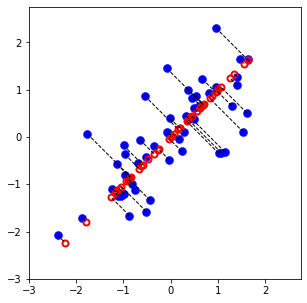

In [8]:
X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_rec[0, 0], X_rec[0, 1]))
print('       (this value should be about  [-1.047419 -1.047419])')

#  Plot the normalized dataset (returned from featureNormalize)
fig, ax = pyplot.subplots(figsize=(5, 5))
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
ax.grid(False)
pyplot.axis([-3, 2.75, -3, 2.75])

# Draw lines connecting the projected points to the original points
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

### 2.4 Face Image Dataset

In this part of the exercise, you will run PCA on face images to see how it can be used in practice for dimension reduction. The dataset `ex7faces.mat` contains a dataset `X` of face images, each $32 \times 32$ in grayscale. This dataset was based on a [cropped version](http://conradsanderson.id.au/lfwcrop/) of the [labeled faces in the wild](http://vis-www.cs.umass.edu/lfw/) dataset. Each row of `X` corresponds to one face image (a row vector of length 1024). 

The next cell will load and visualize the first 100 of these face images similar to what is shown in this figure:

![Faces](Figures/faces.png)

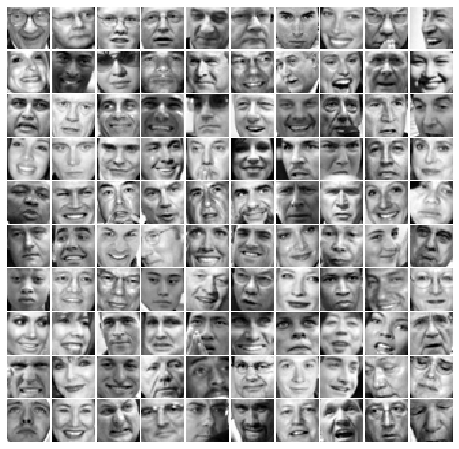

In [10]:
#  Load Face dataset
data = loadmat(os.path.join('Data', 'ex7faces.mat'))
X = data['X']

#  Display the first 100 faces in the dataset
utils.displayData(X[:100, :], figsize=(8, 8))

#### 2.4.1 PCA on Faces

To run PCA on the face dataset, we first normalize the dataset by subtracting the mean of each feature from the data matrix `X`.  After running PCA, you will obtain the principal components of the dataset. Notice that each principal component in `U` (each column) is a vector of length $n$ (where for the face dataset, $n = 1024$). It turns out that we can visualize these principal components by reshaping each of them into a $32 \times 32$ matrix that corresponds to the pixels in the original dataset. 

The following cell will first normalize the dataset for you and then run your PCA code. Then, the first 36 principal components (conveniently called eigenfaces) that describe the largest variations are displayed. If you want, you can also change the code to display more principal components to see how they capture more and more details.

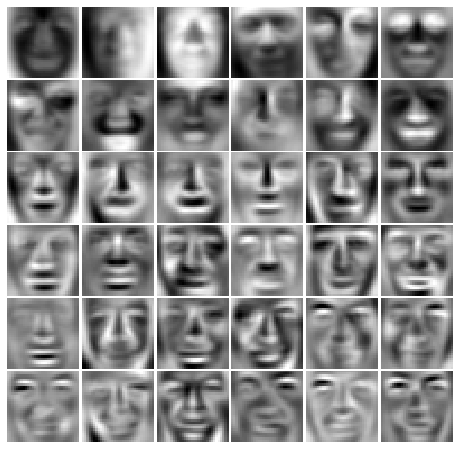

In [11]:
#  normalize X by subtracting the mean value from each feature
X_norm, mu, sigma = utils.featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Visualize the top 36 eigenvectors found
utils.displayData(U[:, :36].T, figsize=(8, 8))

#### 2.4.2 Dimensionality Reduction

Now that you have computed the principal components for the face dataset, you can use it to reduce the dimension of the face dataset. This allows you to use your learning algorithm with a smaller input size (e.g., 100 dimensions) instead of the original 1024 dimensions. This can help speed up your learning algorithm.

The next cell will project the face dataset onto only the first 100 principal components. Concretely, each face image is now described by a vector $z^{(i)} \in \mathbb{R}^{100}$. To understand what is lost in the dimension reduction, you can recover the data using only the projected dataset.

In [12]:
#  Project images to the eigen space using the top k eigenvectors 
#  If you are applying a machine learning algorithm 
K = 100
Z = projectData(X_norm, U, K)

print('The projected data Z has a shape of: ', Z.shape)

The projected data Z has a shape of:  (5000, 100)


In the next cell, an approximate recovery of the data is performed and the original and projected face images
are displayed similar to what is shown here:

<table>
    <tr>
        <td><img src="Figures/faces_original.png" width="300"></td>
        <td><img src="Figures/faces_reconstructed.png" width="300"></td>
    </tr>
</table>

From the reconstruction, you can observe that the general structure and appearance of the face are kept while the fine details are lost. This is a remarkable reduction (more than 10x) in the dataset size that can help speed up your learning algorithm significantly. For example, if you were training a neural network to perform person recognition (given a face image, predict the identity of the person), you can use the dimension reduced input of only a 100 dimensions instead of the original pixels.

In [ ]:
#  Project images to the eigen space using the top K eigen vectors and 
#  visualize only using those K dimensions
#  Compare to the original input, which is also displayed
K = 100
X_rec  = recoverData(Z, U, K)

# Display normalized data
utils.displayData(X_norm[:100, :], figsize=(6, 6))
pyplot.gcf().suptitle('Original faces')

# Display reconstructed data from only k eigenfaces
utils.displayData(X_rec[:100, :], figsize=(6, 6))
pyplot.gcf().suptitle('Recovered faces')
pass